G1  X5.3085000000000  Y5.3085000000000  Z15.0000000000000  F300.0000000000000
G1  X5.3085000000000  Y5.3085000000000  Z0.0000000000000  F120.0000000000000
M106S255
G1  X7.7140555555556  Y5.3085000000000  Z0.0000000000000  F300.0000000000000
G1  X7.6990563012557  Y5.5483556825883  Z0.0030049491388  F300.0000000000000
G1  X7.6469474992283  Y5.7825267756037  Z0.0069474281481  F300.0000000000000
G1  X7.5592304994977  Y6.0047325315966  Z0.0118893808039  F300.0000000000000
G1  X7.4384787727814  Y6.2090405811882  Z0.0179343952359  F300.0000000000000
G1  X7.2882623779290  Y6.3900491163617  Z0.0252273862378  F300.0000000000000
G1  X7.1130416822318  Y6.5430533870016  Z0.0339523930047  F300.0000000000000
G1  X6.9180334954267  Y6.6641913611640  Z0.0443266060655  F300.0000000000000
G1  X6.7090536333888  Y6.7505640221541  Z0.0565881517508  F300.0000000000000
G1  X6.4923406622246  Y6.8003265387726  Z0.0709747974008  F300.0000000000000
G1  X6.2743661648267  Y6.8127474260839  Z0.0876909291692  F300.000

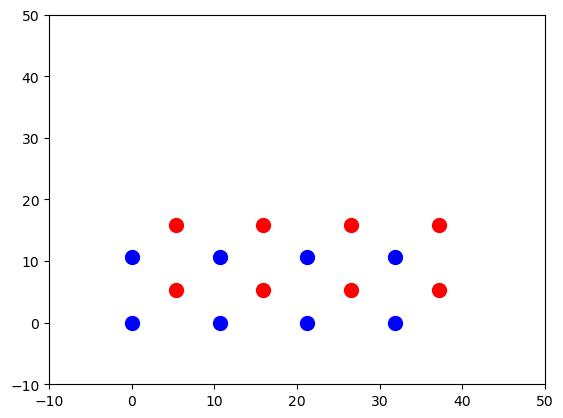

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline

box_x = [0, 50, 50, 0, 0]
box_y = [0, 0, 60, 60, 0]
plt.xlim(-10, 50)
plt.ylim(-10, 50)
offset = 10.617
operations = 0
total_length = 0
'''
def randomcolor(i):
    if i%2==0:
        return 'bo'
    else:
        return 'ro'
'''    

def plot_dots_in_box(dot_coordinates):
    for x, y in dot_coordinates:
        plt.plot(x, y, 'bo', markersize = 10)
def plot_dots_in_box_interweaved(dot_coordinates):
    for x, y in dot_coordinates:
        plt.plot(x, y, 'ro', markersize = 10)

def skein(x_coord, y_coord, z_coord):
    # Parameters for the path calculation
    step = 0.1  # resolution, time step period for each xyz calculation
    k = 4
    dp = 0.08  # change to modify ER, minimum distance between fibers, center to center
    h = 0.3  # height of each layer
    c1 = 2  # standard deviation coefficient
    H = 10  # total height of the skein


    p = dp / (np.pi)
    period = (H - h) / p
    n = (k - 1) / k

    t = np.arange(0, period + step, step)

    t1 = period * np.array([0, 1/5, 2/5, 3/5, 4/5, 1])
    r1 = H * np.array([0.25, 0.4, 0.55, 0.4, 0.36, 0.25])
    pol = np.polyfit(t1, r1, 3)

    a = np.polyval(pol, t)
    c = a / c1

    theta = t
    rho = a * np.cos(n * t)

    z = h * (np.exp(- (rho**2 / (2 * c**2))))
    z = z - z[0]
    dz = p * theta
    z = z + dz
    x, y = rho * np.cos(theta), rho * np.sin(theta)

    #s = np.sum(np.sqrt(np.diff(x)**2 + np.diff(y)**2 + np.diff(z)**2))
    #er = s / H
    #print(f"Effective radius (ER): {er}")

    speed = 5 * 60  # mm/min

    motion = np.column_stack((x, y, z))
    motion[:, 0] += x_coord
    motion[:, 1] += y_coord
    motion[:, 2] += z_coord

    skeingcode = ""
    for i in range(len(motion)):
        x_str = f"X{motion[i, 0]:2.13f}"
        y_str = f"Y{motion[i, 1]:2.13f}"
        z_str = f"Z{motion[i, 2]:2.13f}"
        f_str = f"F{speed:2.13f}"
        skeingcode += f"G1  {x_str}  {y_str}  {z_str}  {f_str}\n"
    print(skeingcode)

HorizontalIterations = 1
VerticalIterations = 1

#Skein Code
for h in range(HorizontalIterations):
    for v in range(VerticalIterations):
        operations += 1
        x = (0.5+2*h)*offset
        y = (0.5+2*v)*offset
        X = f"{x:.13f}"
        Y = f"{y:.13f}"
        print("G1  X" + str(X) + "  Y" + str(Y) + "  Z15.0000000000000" + "  F300.0000000000000")
        print("G1  X" + str(X) + "  Y" + str(Y) + "  Z0.0000000000000" + "  F120.0000000000000")
        print("M106S255")
        skein(x, y, 0)
        print("M107")
        print("G1  X" + str(X) + "  Y" + str(Y) + "  Z15.0000000000000" + "  F300.0000000000000")
    for v in range(VerticalIterations):
        operations += 1
        x = (1.5+2*h)*offset
        y = (1.5+2*v)*offset
        X = f"{x:.13f}"
        Y = f"{y:.13f}"
        print("G1  X" + str(X) + "  Y" + str(Y) + "  Z15.0000000000000" + "  F300.0000000000000")
        print("G1  X" + str(X) + "  Y" + str(Y) + "  Z0.0000000000000" + "  F120.0000000000000")
        print("M106S255\n")
        skein(x, y, 0)
        print("M107\n")
        print("G1  X" + str(X) + "  Y" + str(Y) + "  Z15.0000000000000" + "  F300.0000000000000")

#2D Simulation Code
for h in range(HeightIterations):
    for v in range(VerticalIterations):
        dot_coordinates = [(2*h*offset, offset+offset*2*v), (2*h*offset, offset*2*v), ((1+2*h)*offset, offset*2*v), ((1+2*h)*offset, offset+offset*2*v)]
        plot_dots_in_box(dot_coordinates)
    for v in range(VerticalIterations):
        dot_coordinates = [((0.5+2*h)*offset, offset/2+offset+offset*2*v), ((0.5+2*h)*offset, offset/2+offset*2*v), ((1.5+2*h)*offset, offset/2+offset*2*v), ((1.5+2*h)*offset, offset/2+offset+offset*2*v)]
        plot_dots_in_box_interweaved(dot_coordinates)

print("Number of Operations: " + str(operations))
print("Number of Skeins: " + str(operations*4))
#Print time of 8mm: 2:52min per Skein, 3:03min for full operation
#Print time of 10mm: 4:30min per Skein, 4:42min for full operation
print("Estimated Print Time: " + str((operations * (3*60+3))/3600) + " hours")
#Length of 10mm: 1742.2774241193479mm
#Length of 9mm: 1408.6628140280077mm
#Length of 8mm: 1110.3315252863424mm
#Length of 7mm: 847.4641796523133mm
print("Estimated Length: " + str(operations * 9 * 1742.2774241193479/1000) + " meters")
plt.show()